In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

# Normalize pixel values to the range [0, 1]
# Reshaping is not necessary as the model expects (32, 32, 3) shape
# x_train=x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32') / 255.0
# x_test=x_test.reshape(10000,32*32*3) # Changed the first dimension to 10000 to match x_test shape
x_test = x_test.astype('float32') / 255.0

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    # The input shape is automatically inferred since it's the first layer
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(112, activation='relu'),
    Dense(56, activation='relu'),
    Dense(28, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=300, batch_size=1000, validation_data=(x_test, y_test))

(50000, 32, 32, 3)
(10000, 32, 32, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.1334 - loss: 2.2943 - val_accuracy: 0.2361 - val_loss: 2.0756
Epoch 2/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.2485 - loss: 2.0436 - val_accuracy: 0.3084 - val_loss: 1.9174
Epoch 3/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.3145 - loss: 1.8827 - val_accuracy: 0.3303 - val_loss: 1.8329
Epoch 4/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.3360 - loss: 1.8157 - val_accuracy: 0.3518 - val_loss: 1.7793
Epoch 5/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.3614 - loss: 1.7644 - val_accuracy: 0.3860 - val_loss: 1.7033
Epoch 6/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.3902 - loss: 1.6986 - val_accuracy: 0.3939 - val_loss: 1.6879
Epoch 7/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.4076 - loss: 1.6523 - val_accuracy: 0.4056 - val_loss: 1.6594
Epoch 8/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.4217 - loss: 1.6180 - val

In [ ]:
model.save('hw_cifar10.keras')

In [2]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('hw_cifar10.keras')

# Check the model summary to verify it loaded correctly
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 112)                 │          28,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 56)                  │           6,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 28)                  │           1,596 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 10)                  │             290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,225,108 (19.93 MB)

 Trainable params: 1,741,702 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,483,406 (13.29 MB)

In [3]:
# Define a list of class names corresponding to the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

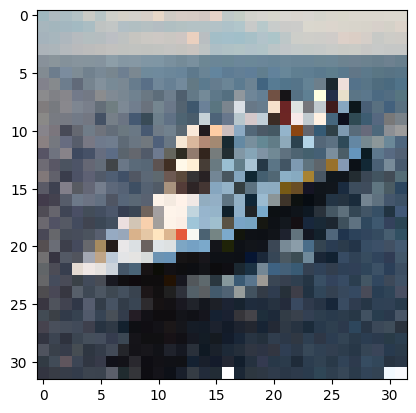

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: ship


In [12]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import numpy as np

img = load_img('/content/Disney Treasure - Exterior 2.webp', target_size=(32, 32)) # Resize to 32x32
plt.imshow(img)
plt.show()
img = img_to_array(img)

# Reshape the image to match the input shape of the model
# img = img.reshape(1, 32*32*3) # Reshape to (1, 3072) - Incorrect
img = img.reshape(1, 32, 32, 3) # Reshape to (1, 32, 32, 3) - Correct shape for the model
img = img.astype('float32')
img = img / 255.0

np.argmax(model.predict(img), axis=1)
# Get the predicted class index
predicted_class_index = np.argmax(model.predict(img), axis=1)[0]

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Predicted class:", predicted_class_name)